In [54]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py

In [55]:
data = pd.read_csv('/content/sample_data/99Acres_gurgaon_hyderabad_Secunderabad_cleaning_and_featureEng.csv')

In [56]:
data.head(1)

,Unnamed: 0,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,...,POWER_BACKUP,CLUB_HOUSE,PARKING,PARKING.1,ATM,GYM,LIFT,WASTE_DISPOSAL,GAS_PIPELINE,NEAR_BANK
0,0,Residential Apartment,Secunderabad,1,2.0,2,4,1,5,"23,24,5,17,6,20,21",...,0,0,0,1,0,0,1,0,0,0


In [57]:
data.rename(columns = {'Unnamed: 0' : 'index'}, inplace=True)

In [58]:
data.set_index('index', inplace=True)

In [59]:
data.drop(columns = ['PARKING.1','FEATURES'], inplace = True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15349 entries, 0 to 18728
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROPERTY_TYPE   15349 non-null  object 
 1   CITY            15349 non-null  object 
 2   OWNTYPE         15349 non-null  int64  
 3   BEDROOM_NUM     15349 non-null  float64
 4   FURNISH         15349 non-null  int64  
 5   FACING          15349 non-null  int64  
 6   AGE             15349 non-null  int64  
 7   TOTAL_FLOOR     15349 non-null  int64  
 8   PRICE_SQFT      15349 non-null  float64
 9   AREA            15349 non-null  float64
 10  PRICE           15349 non-null  float64
 11  BALCONY_NUM     15349 non-null  int64  
 12  FLOOR_NUM       15349 non-null  int64  
 13  BHK             15349 non-null  int64  
 14  LOCALITY        15349 non-null  object 
 15  LATITUDE        15349 non-null  float64
 16  LONGITUDE       15349 non-null  float64
 17  LUXURY          15349 non-null  obje

In [61]:
data.isnull().sum()

PROPERTY_TYPE     0
CITY              0
OWNTYPE           0
BEDROOM_NUM       0
FURNISH           0
FACING            0
AGE               0
TOTAL_FLOOR       0
PRICE_SQFT        0
AREA              0
PRICE             0
BALCONY_NUM       0
FLOOR_NUM         0
BHK               0
LOCALITY          0
LATITUDE          0
LONGITUDE         0
LUXURY            0
SWIMMING_POOL     0
POWER_BACKUP      0
CLUB_HOUSE        0
PARKING           0
ATM               0
GYM               0
LIFT              0
WASTE_DISPOSAL    0
GAS_PIPELINE      0
NEAR_BANK         0
dtype: int64

# **Property Type**

<Axes: xlabel='PROPERTY_TYPE'>

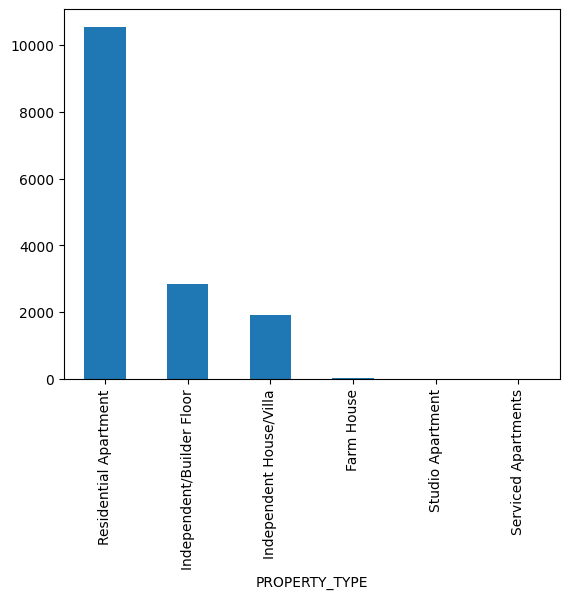

In [62]:
data['PROPERTY_TYPE'].value_counts().plot(kind='bar')

# **Observation**
- data contains more than 75% of Residential Apartment
- No Missing values

# **City**

In [63]:
data['CITY'].describe()

count       15349
unique          3
top       Gurgaon
freq        10467
Name: CITY, dtype: object

<Axes: xlabel='CITY'>

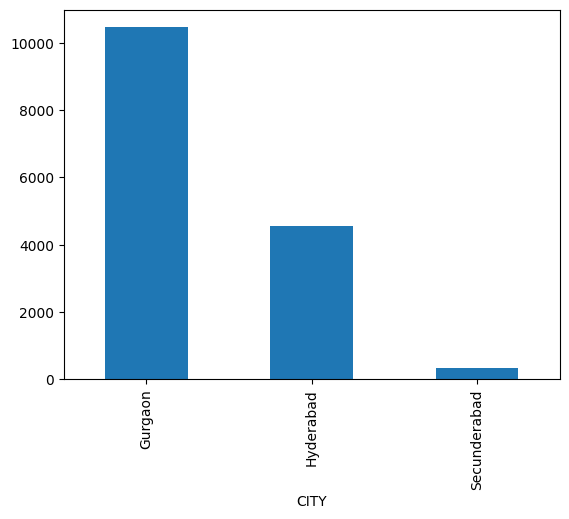

In [64]:
data['CITY'].value_counts().plot(kind='bar')

# **Obseravation**
- Taken 3 citys for dataset
- Maximum data is of gurgaon
- No Missing values

# **OwnType**
- It is a categorical column
- 0 -> New Property
- 1 -> Free Hold
- 2 -> Lease Hold
- 3 -> Co-operative society
- 4 -> Power of Attorney

In [65]:
data['OWNTYPE'].value_counts()

OWNTYPE
1    13479
0     1668
2       72
4       67
3       63
Name: count, dtype: int64

In [66]:
data['OWNTYPE'].isnull().sum()

0

<Axes: xlabel='OWNTYPE'>

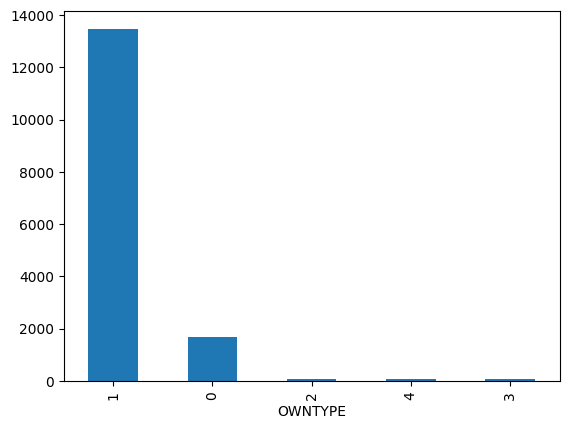

In [67]:
data['OWNTYPE'].value_counts().plot(kind='bar')

# **Observation**
- No missing values
- data contains approximatly 90% of the FreeHold




# **Bedroom Number**

In [68]:
data['BEDROOM_NUM'] = data['BEDROOM_NUM'].astype(int)

<Axes: xlabel='BEDROOM_NUM'>

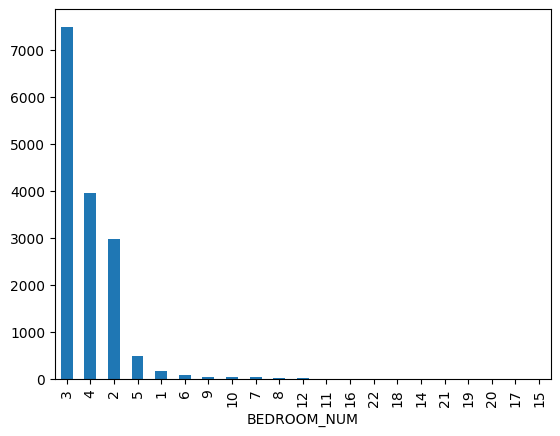

In [69]:
data['BEDROOM_NUM'].value_counts().plot(kind='bar')

<Axes: xlabel='BEDROOM_NUM', ylabel='PRICE'>

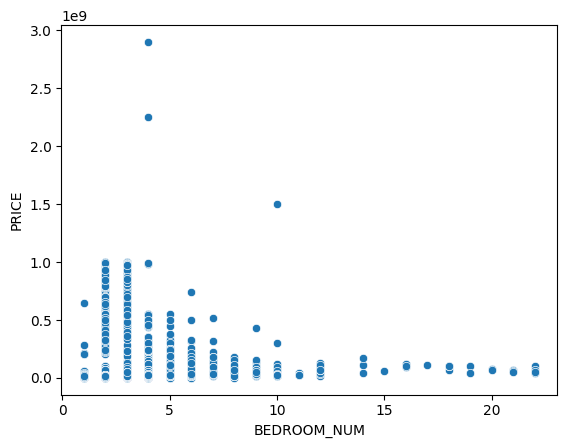

In [70]:
sns.scatterplot(x='BEDROOM_NUM', y='PRICE', data=data)

<Axes: xlabel='BEDROOM_NUM'>

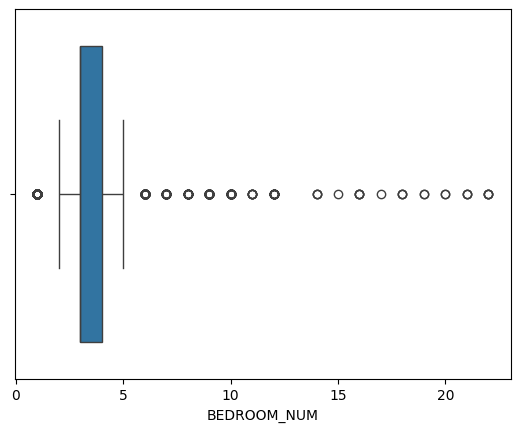

In [71]:
sns.boxplot(x='BEDROOM_NUM', data=data)

# **Observation**
- No Missing value
- Few Outliers can be seen in boxplot

# **FURNISH**

In [72]:
data['FURNISH'].value_counts()

FURNISH
4    9363
2    4262
1    1282
0     442
Name: count, dtype: int64

In [73]:
data['FURNISH'].isnull().sum()

0

<Axes: xlabel='FURNISH'>

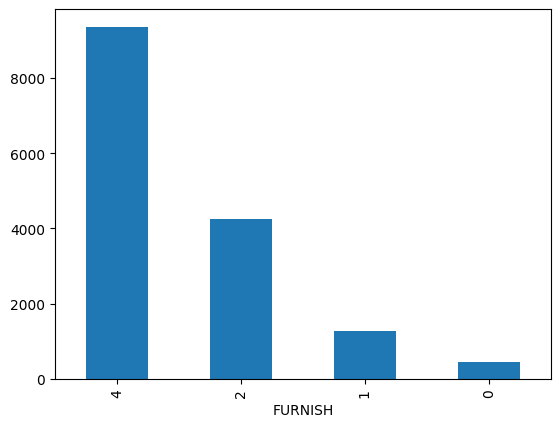

In [74]:
data['FURNISH'].value_counts().plot(kind='bar')

# **Obeservation**
- No Missing Values
- Most of the data indicates 4 that is semifurnished

# **AGE**

In [75]:
data['AGE'].value_counts()

AGE
1    5191
6    4149
5    3187
2    1938
3     881
0       3
Name: count, dtype: int64

In [76]:
data = data[data['AGE'] != 0]

<Axes: xlabel='AGE'>

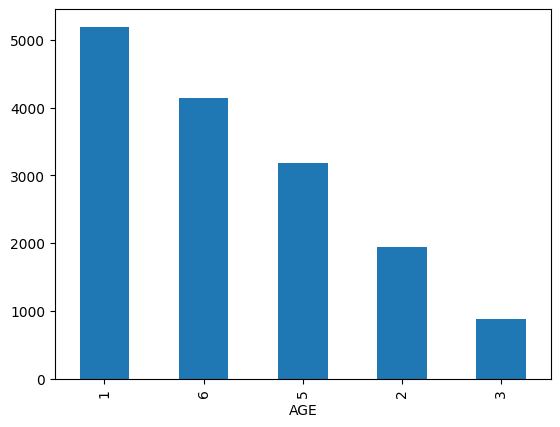

In [77]:
data['AGE'].value_counts().plot(kind='bar')

# **Obesrvation**
- No Missing Values
- data shows most of the property are 1-5 yrs old

# **PRICE_SQFT**

<Axes: xlabel='PRICE_SQFT'>

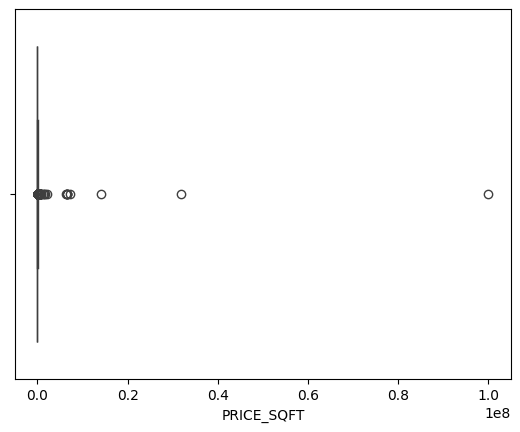

In [78]:
sns.boxplot(x='PRICE_SQFT', data=data)

<Axes: ylabel='Density'>

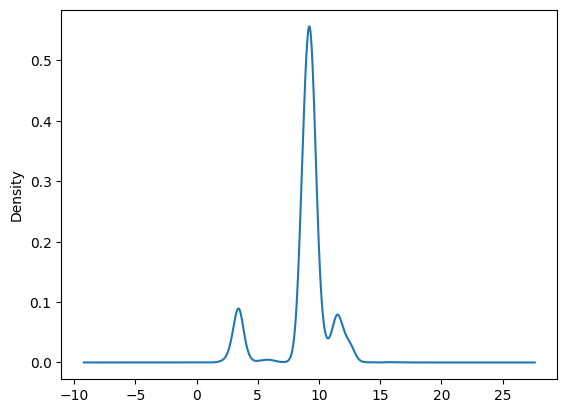

In [79]:
np.log1p(data['PRICE_SQFT']).plot(kind='kde')

In [80]:
data[data['PRICE_SQFT'] > 15000000]

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,AREA,...,SWIMMING_POOL,POWER_BACKUP,CLUB_HOUSE,PARKING,ATM,GYM,LIFT,WASTE_DISPOSAL,GAS_PIPELINE,NEAR_BANK
index,,,,,,,,,,,,,,,,,,,,,
1641,Farm House,Secunderabad,1,6,0,4,3,1,31814273.0,1013205.0,...,0,0,0,0,0,0,0,0,0,0
4098,Independent House/Villa,Hyderabad,1,3,0,0,5,3,100000000.0,43560.0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
data.loc[1641 , 'PRICE_SQFT'] = 730.3

In [82]:
data.loc[4098 , "PRICE_SQFT"] = 2295.6

In [83]:
data[data['PRICE_SQFT'] > 15000000]

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,AREA,...,SWIMMING_POOL,POWER_BACKUP,CLUB_HOUSE,PARKING,ATM,GYM,LIFT,WASTE_DISPOSAL,GAS_PIPELINE,NEAR_BANK
index,,,,,,,,,,,,,,,,,,,,,


In [84]:
100000000.0/43560.0

2295.684113865932

In [85]:
data = data[data['PRICE_SQFT'] != 0]

<Axes: xlabel='PRICE_SQFT'>

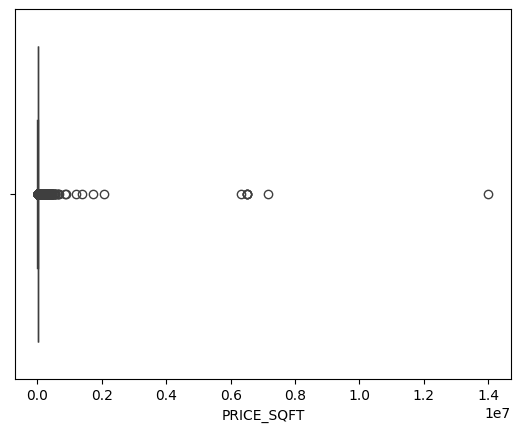

In [86]:
sns.boxplot(x='PRICE_SQFT', data=data)

<Axes: ylabel='Density'>

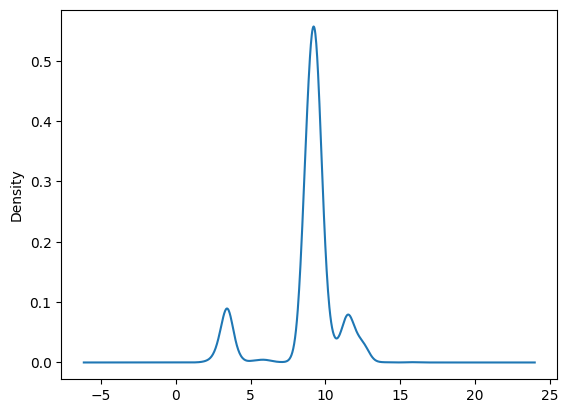

In [87]:
np.log1p(data['PRICE_SQFT']).plot(kind='kde')

# **Obeservation**


*   No Missing values
*   PRICE_SQFT have one 0 value and have inconsistent data so dropped that data



# **PRICE**

In [88]:
data['PRICE'].describe()

count    1.534500e+04
mean     5.305910e+07
std      1.408615e+08
min      6.300000e+03
25%      1.150000e+07
50%      2.000000e+07
75%      3.650000e+07
max      2.900000e+09
Name: PRICE, dtype: float64

<Axes: xlabel='PRICE'>

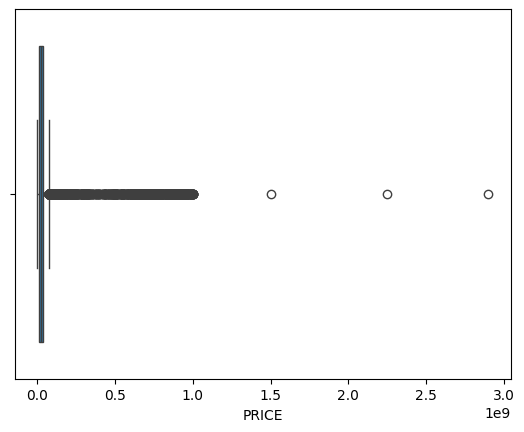

In [89]:
sns.boxplot(x='PRICE', data=data)

In [90]:
data[data["PRICE"] > 1000000000]

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,AREA,...,SWIMMING_POOL,POWER_BACKUP,CLUB_HOUSE,PARKING,ATM,GYM,LIFT,WASTE_DISPOSAL,GAS_PIPELINE,NEAR_BANK
index,,,,,,,,,,,,,,,,,,,,,
8688,Residential Apartment,Gurgaon,1,10,1,0,6,38,88235.0,17000.0,...,1,1,1,0,1,1,1,0,0,0
12993,Independent/Builder Floor,Gurgaon,1,4,4,5,6,4,1190476.0,1890.0,...,0,0,0,0,0,0,0,1,1,0
17239,Independent/Builder Floor,Gurgaon,1,4,4,0,6,4,2071428.0,2430.0,...,1,0,1,0,1,1,1,1,1,1


In [91]:
data.drop(data[data["PRICE"] > 1000000000].index, inplace=True)

<Axes: xlabel='PRICE'>

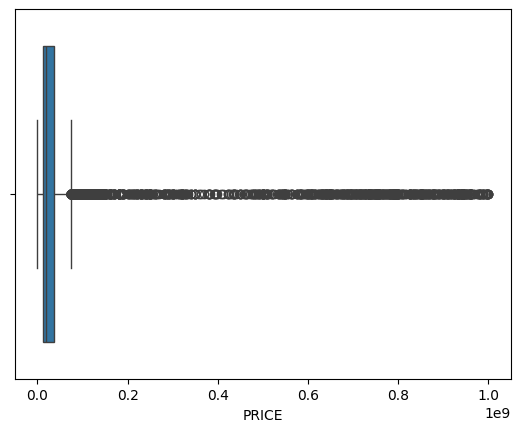

In [92]:
sns.boxplot(x='PRICE', data=data)

# **Obesrvation**

*   data has lot of outlies
*   No Missing values



# **BALCONY_NUM**

In [93]:
data['BALCONY_NUM'].value_counts()

BALCONY_NUM
2    5299
3    3750
4    3633
1    2548
0     112
Name: count, dtype: int64

In [94]:
data['BALCONY_NUM'].isnull().sum()

0

<Axes: xlabel='BALCONY_NUM'>

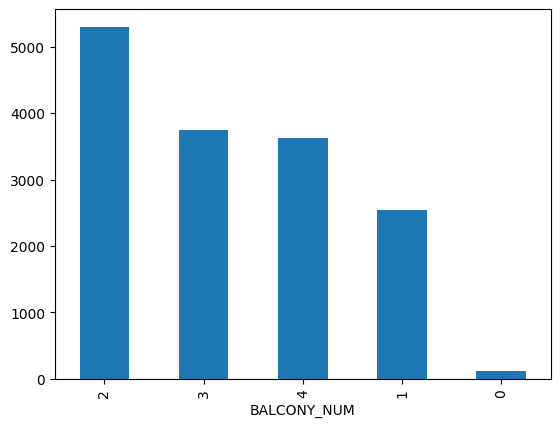

In [95]:
data['BALCONY_NUM'].value_counts().plot(kind='bar')

# **Obesrvation**
- data contains lot of listings with 2 balcony number
- No Missing values

# **BHK**

In [96]:
data['BHK'].value_counts()

BHK
3     7656
4     3817
2     2896
5      493
1      213
6       83
10      41
9       37
7       36
8       23
12      19
11       5
21       4
16       4
14       3
22       3
19       2
0        2
20       2
15       1
18       1
17       1
Name: count, dtype: int64

<Axes: xlabel='BHK'>

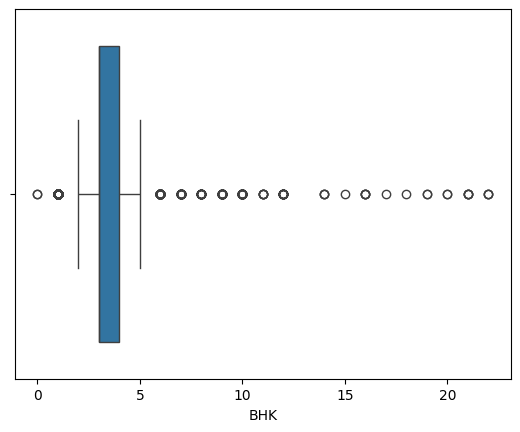

In [97]:
sns.boxplot(x='BHK', data=data)

In [98]:
data[data['BHK'] == 0]

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,AREA,...,SWIMMING_POOL,POWER_BACKUP,CLUB_HOUSE,PARKING,ATM,GYM,LIFT,WASTE_DISPOSAL,GAS_PIPELINE,NEAR_BANK
index,,,,,,,,,,,,,,,,,,,,,
12814,Residential Apartment,Gurgaon,1,4,4,3,2,14,10624.0,2567.0,...,1,0,1,0,1,1,1,0,1,1
16093,Independent/Builder Floor,Gurgaon,1,2,4,5,1,2,9606.0,1093.0,...,1,0,1,0,1,0,0,1,1,1


In [99]:
data.loc[12812, 'BHK'] = data.loc[12812 , 'BEDROOM_NUM']
data.loc[16086, 'BHK'] = data.loc[16086, 'BEDROOM_NUM']

In [100]:
data[data['BHK'] == 0]

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,AREA,...,SWIMMING_POOL,POWER_BACKUP,CLUB_HOUSE,PARKING,ATM,GYM,LIFT,WASTE_DISPOSAL,GAS_PIPELINE,NEAR_BANK
index,,,,,,,,,,,,,,,,,,,,,
12814,Residential Apartment,Gurgaon,1,4,4,3,2,14,10624.0,2567.0,...,1,0,1,0,1,1,1,0,1,1
16093,Independent/Builder Floor,Gurgaon,1,2,4,5,1,2,9606.0,1093.0,...,1,0,1,0,1,0,0,1,1,1


# **Observation**
- No Missing Data
- Little Outliers present

# **LOCALITY**

In [101]:
data['LOCALITY'].value_counts().shape

(220,)

<Axes: xlabel='LOCALITY'>

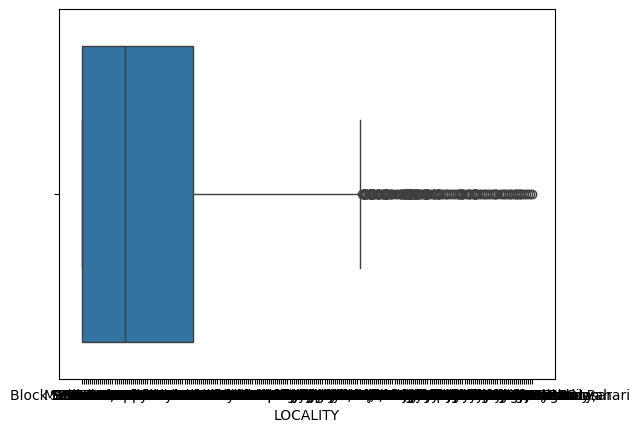

In [102]:
sns.boxplot(x='LOCALITY', data=data)

# **Observation**
- No Missing Value
- Boxplot suggest there is outliers but data seems correct

# **LUXURY**

In [103]:
data['LUXURY'].value_counts()

LUXURY
Luxury         15012
Budget           169
Semi-luxury      161
Name: count, dtype: int64

In [104]:
data['LUXURY'].isnull().sum()

0

<Axes: xlabel='LUXURY'>

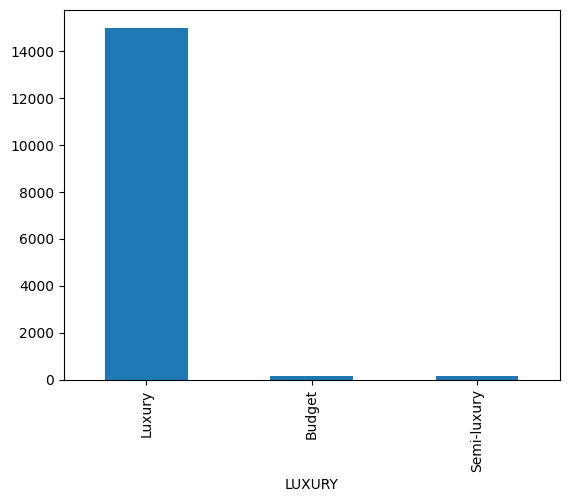

In [105]:
data['LUXURY'].value_counts().plot(kind='bar')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15342 entries, 0 to 18728
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROPERTY_TYPE   15342 non-null  object 
 1   CITY            15342 non-null  object 
 2   OWNTYPE         15342 non-null  int64  
 3   BEDROOM_NUM     15342 non-null  int64  
 4   FURNISH         15342 non-null  int64  
 5   FACING          15342 non-null  int64  
 6   AGE             15342 non-null  int64  
 7   TOTAL_FLOOR     15342 non-null  int64  
 8   PRICE_SQFT      15342 non-null  float64
 9   AREA            15342 non-null  float64
 10  PRICE           15342 non-null  float64
 11  BALCONY_NUM     15342 non-null  int64  
 12  FLOOR_NUM       15342 non-null  int64  
 13  BHK             15342 non-null  int64  
 14  LOCALITY        15342 non-null  object 
 15  LATITUDE        15342 non-null  float64
 16  LONGITUDE       15342 non-null  float64
 17  LUXURY          15342 non-null  obje